In [1]:
# ============================================================
# Exponential Smoothing Analysis of Electricity Consumption
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import (
    SimpleExpSmoothing,
    ExponentialSmoothing
)


In [3]:

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv("./ML471_S1_Datafile_Concept.csv")

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

consumption = df['Consumption']



In [4]:


# ------------------------------------------------------------
# 3. SINGLE EXPONENTIAL SMOOTHING (SES)
# ------------------------------------------------------------
ses_model = SimpleExpSmoothing(consumption).fit(
    smoothing_level=0.2,
    optimized=False
)
ses_fitted = ses_model.fittedvalues




d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [5]:

# ------------------------------------------------------------
# 4. DOUBLE EXPONENTIAL SMOOTHING (HOLT'S METHOD)
# ------------------------------------------------------------
holt_model = ExponentialSmoothing(
    consumption,
    trend='additive',
    seasonal=None
).fit()

holt_fitted = holt_model.fittedvalues



d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [6]:


# ------------------------------------------------------------
# 5. TRIPLE EXPONENTIAL SMOOTHING (HOLT-WINTERS)
# ------------------------------------------------------------
hw_model = ExponentialSmoothing(
    consumption,
    trend='additive',
    seasonal='additive',
    seasonal_periods=12
).fit()

hw_fitted = hw_model.fittedvalues



d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


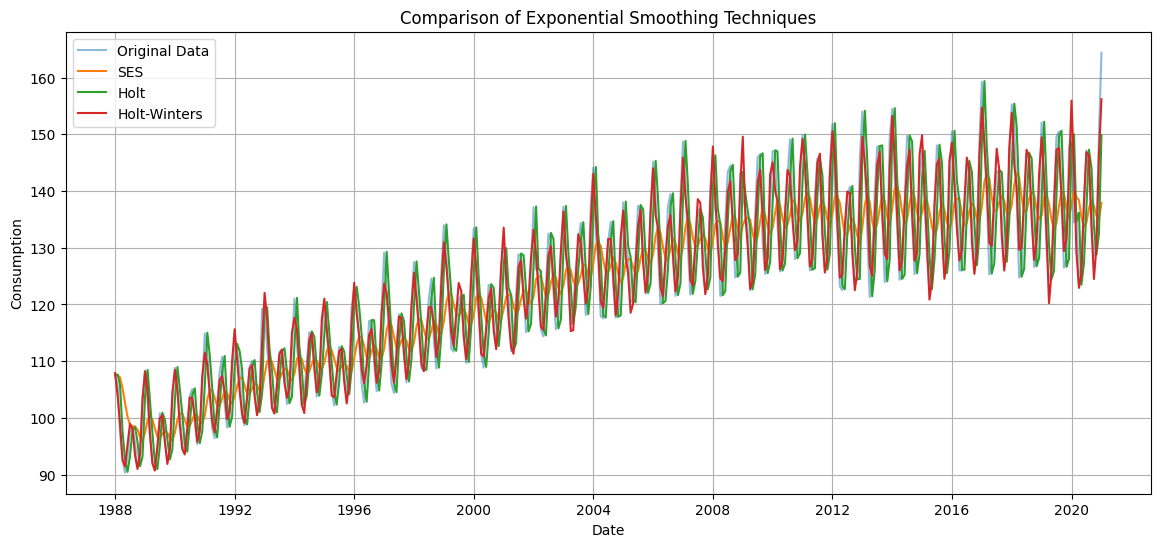

In [7]:


# ------------------------------------------------------------
# 6. COMPARISON OF ALL METHODS
# ------------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(consumption, label="Original Data", alpha=0.5)
plt.plot(ses_fitted, label="SES")
plt.plot(holt_fitted, label="Holt")
plt.plot(hw_fitted, label="Holt-Winters")
plt.title("Comparison of Exponential Smoothing Techniques")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.show()